In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv("C:\\Users\prave\datasets\csv files\startups.csv")

# Exploring Dataset

In [13]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
print("shape of the dataset:",df.shape)

shape of the dataset: (50, 5)


In [10]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**Note:** No features has null values in the dataset

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


# Exploratory Data Analysis

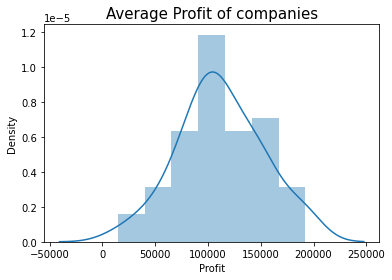

In [23]:
# Average "profit" for every company 

sns.distplot(df['Profit'])
plt.title("Average Profit of companies",size=15)
plt.show()

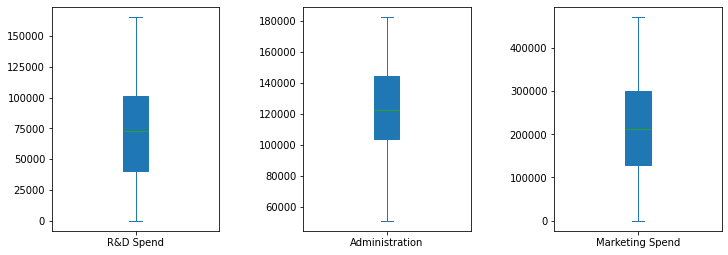

In [82]:
# Checking outliers for each features
col=df[['R&D Spend','Administration','Marketing Spend']]
# subplots
col.plot(subplots=True,layout=(3,3),kind='box',figsize=(12,14),patch_artist=True)
plt.subplots_adjust(wspace=0.5)

In [39]:
# Average of each feauture with state wise
state_avg=df.groupby(['State']).mean().sort_values(by='Profit',ascending=False)
state_avg

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471
California,64657.674118,120746.507059,182540.929412,103905.175294


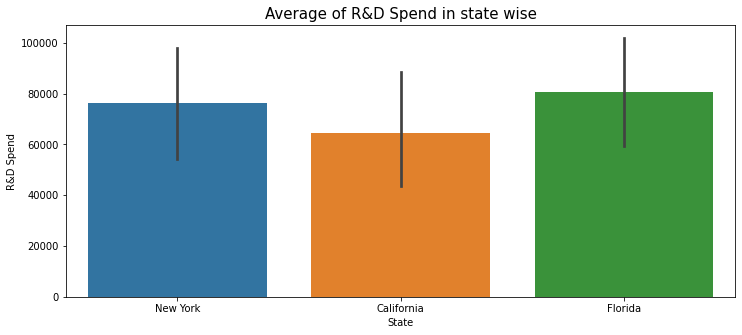

In [59]:
plt.figure(figsize=(12,5))
sns.barplot(x='State',y='R&D Spend',data=df)
plt.title("Average of R&D Spend in state wise",size=15)
plt.show()

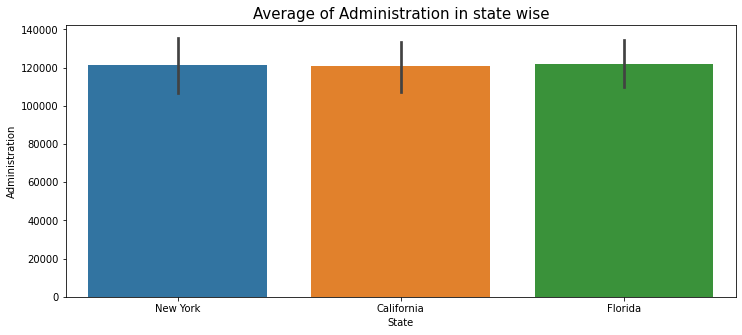

In [60]:
plt.figure(figsize=(12,5))
sns.barplot(x='State',y='Administration',data=df)
plt.title("Average of Administration in state wise",size=15)
plt.show()

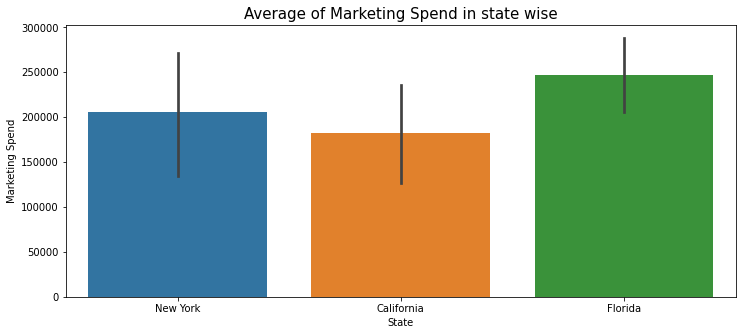

In [62]:
plt.figure(figsize=(12,5))
sns.barplot(x='State',y='Marketing Spend',data=df)
plt.title("Average of Marketing Spend in state wise",size=15)
plt.show()

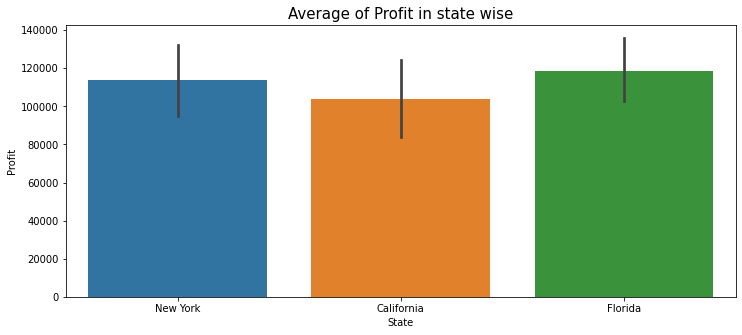

In [63]:
plt.figure(figsize=(12,5))
sns.barplot(x='State',y='Profit',data=df)
plt.title("Average of Profit in state wise",size=15)
plt.show()

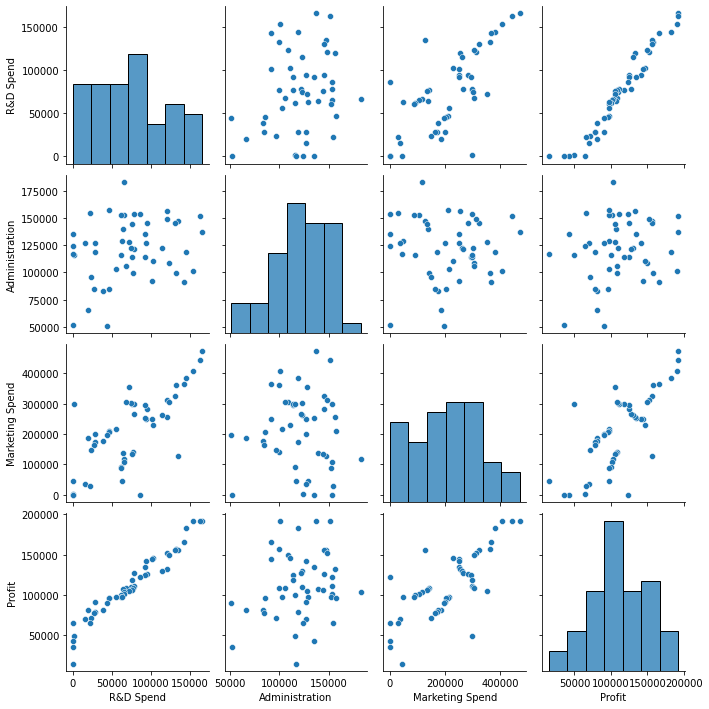

In [65]:
sns.pairplot(df)

In [67]:
# encoding the 'State' feature into numeric
df['State']=df['State'].map({'New York':1,'California':2,'Florida':3})

<AxesSubplot:>

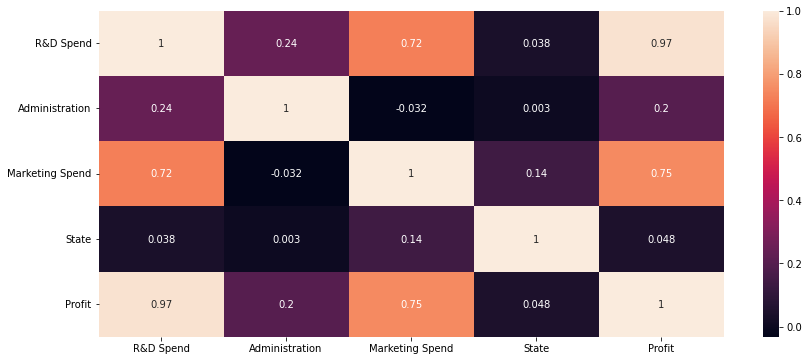

In [75]:
corr=df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(corr,annot=True)

**Insight:** Profit and R&D Spend features have positive correlation(**0.97**) 

# Split Dataset

In [84]:
x=df.drop('Profit',axis=1)
y=df['Profit']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model Building      

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [95]:
# LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
lr.score(X_test,y_test)

0.9348088470484868

In [104]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
dt.score(X_test,y_test)

0.9769115725762466

In [105]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
rf.score(X_test,y_test)

0.9586049043428811

From the above **DecisionTreeRegressor** Algorithm is giving  highest accuracy score

# Make Prediction

In [109]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [112]:
def prediction(RD_Spend,Administration,Marketing_Spend,State):
    RD_Spend=float(RD_Spend)
    Administration=float(Administration)
    Marketing_Spend=float(Marketing_Spend)
    State=int(State)
    
    x=[[RD_Spend,Administration,Marketing_Spend,State]]
    return dt.predict(x)

In [118]:
predict = prediction(12345.89,8945.89902,235612.00,3)[0]
print("Startup Profit Prediction:",predict)

Startup Profit Prediction: 49490.75


In [125]:
predict = prediction(33245.89,945.89902,35612.0345,3)[0]
print("Startup Profit Prediction:",predict)

Startup Profit Prediction: 78239.91


In [126]:
predict = prediction(82345.89,18945.89902,435612.00,1)[0]
print("Startup Profit Prediction:",predict)

Startup Profit Prediction: 108552.04
